In [10]:
from utils import (
    load_data,
    add_past_hours,
    add_technical_indicators
)
from talib import RSI
import polars as pl
# import matplotlib.pyplot as plt
# from torch import tensor

# %matplotlib inline

In [31]:
df = load_data()

df.with_columns(
    pl.lit(RSI(df.select("Close").to_series(), timeperiod=14)).alias("RSI")
)
    # RSI(pl.col("Close"))
# )
# df.select("Close")
# df = add_technical_indicators(df)

# df
# df = add_past_hours(df)
# df = df.with_columns(pl.lit(0.0).alias("Buy/Sold/Hold"))
# train_df, trade_df = train_test_split(df)

Datetime,Close,Ticker,RSI
"datetime[ns, UTC]",f64,str,f64
2022-04-07 03:45:00 UTC,512.25,"""SBIN.NS""",NaN
2022-04-07 04:45:00 UTC,514.599976,"""SBIN.NS""",NaN
2022-04-07 05:45:00 UTC,519.25,"""SBIN.NS""",NaN
2022-04-07 06:45:00 UTC,519.0,"""SBIN.NS""",NaN
2022-04-07 07:45:00 UTC,513.099976,"""SBIN.NS""",NaN
2022-04-07 08:45:00 UTC,513.849976,"""SBIN.NS""",NaN
2022-04-07 09:45:00 UTC,514.950012,"""SBIN.NS""",NaN
2022-04-08 03:45:00 UTC,517.650024,"""SBIN.NS""",NaN
2022-04-08 04:45:00 UTC,513.849976,"""SBIN.NS""",NaN


In [28]:
train_df

Datetime,Close,Ticker,PAST_1_HOUR,PAST_2_HOUR,PAST_3_HOUR,PAST_4_HOUR,PAST_5_HOUR,PAST_6_HOUR,PAST_7_HOUR,PAST_8_HOUR,PAST_9_HOUR,PAST_10_HOUR,PAST_11_HOUR,PAST_12_HOUR,PAST_13_HOUR,PAST_14_HOUR,Buy/Sold/Hold
"datetime[ns, UTC]",f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2022-04-11 03:45:00 UTC,519.450012,"""SBIN.NS""",516.099976,515.900024,517.200012,516.25,515.700012,513.849976,517.650024,514.950012,513.849976,513.099976,519.0,519.25,514.599976,512.25,0.0
2022-04-11 04:45:00 UTC,518.900024,"""SBIN.NS""",519.450012,516.099976,515.900024,517.200012,516.25,515.700012,513.849976,517.650024,514.950012,513.849976,513.099976,519.0,519.25,514.599976,0.0
2022-04-11 05:45:00 UTC,518.099976,"""SBIN.NS""",518.900024,519.450012,516.099976,515.900024,517.200012,516.25,515.700012,513.849976,517.650024,514.950012,513.849976,513.099976,519.0,519.25,0.0
2022-04-11 06:45:00 UTC,519.5,"""SBIN.NS""",518.099976,518.900024,519.450012,516.099976,515.900024,517.200012,516.25,515.700012,513.849976,517.650024,514.950012,513.849976,513.099976,519.0,0.0
2022-04-11 07:45:00 UTC,518.75,"""SBIN.NS""",519.5,518.099976,518.900024,519.450012,516.099976,515.900024,517.200012,516.25,515.700012,513.849976,517.650024,514.950012,513.849976,513.099976,0.0
2022-04-11 08:45:00 UTC,515.150024,"""SBIN.NS""",518.75,519.5,518.099976,518.900024,519.450012,516.099976,515.900024,517.200012,516.25,515.700012,513.849976,517.650024,514.950012,513.849976,0.0
2022-04-11 09:45:00 UTC,514.900024,"""SBIN.NS""",515.150024,518.75,519.5,518.099976,518.900024,519.450012,516.099976,515.900024,517.200012,516.25,515.700012,513.849976,517.650024,514.950012,0.0
2022-04-12 03:45:00 UTC,506.149994,"""SBIN.NS""",514.900024,515.150024,518.75,519.5,518.099976,518.900024,519.450012,516.099976,515.900024,517.200012,516.25,515.700012,513.849976,517.650024,0.0
2022-04-12 04:45:00 UTC,508.399994,"""SBIN.NS""",506.149994,514.900024,515.150024,518.75,519.5,518.099976,518.900024,519.450012,516.099976,515.900024,517.200012,516.25,515.700012,513.849976,0.0


In [3]:
trade_df

Datetime,Close,Ticker,PAST_1_HOUR,PAST_2_HOUR,PAST_3_HOUR,PAST_4_HOUR,PAST_5_HOUR,PAST_6_HOUR,PAST_7_HOUR,PAST_8_HOUR,PAST_9_HOUR,PAST_10_HOUR,PAST_11_HOUR,PAST_12_HOUR,PAST_13_HOUR,PAST_14_HOUR,Buy/Sold/Hold
"datetime[ns, UTC]",f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2023-07-04 06:45:00 UTC,591.950012,"""SBIN.NS""",595.299988,593.0,586.650024,585.450012,584.900024,582.900024,582.799988,579.75,577.950012,577.5,572.849976,573.150024,571.75,572.299988,0.0
2023-07-04 07:45:00 UTC,589.549988,"""SBIN.NS""",591.950012,595.299988,593.0,586.650024,585.450012,584.900024,582.900024,582.799988,579.75,577.950012,577.5,572.849976,573.150024,571.75,0.0
2023-07-04 08:45:00 UTC,588.450012,"""SBIN.NS""",589.549988,591.950012,595.299988,593.0,586.650024,585.450012,584.900024,582.900024,582.799988,579.75,577.950012,577.5,572.849976,573.150024,0.0
2023-07-04 09:45:00 UTC,588.849976,"""SBIN.NS""",588.450012,589.549988,591.950012,595.299988,593.0,586.650024,585.450012,584.900024,582.900024,582.799988,579.75,577.950012,577.5,572.849976,0.0
2023-07-05 03:45:00 UTC,589.349976,"""SBIN.NS""",588.849976,588.450012,589.549988,591.950012,595.299988,593.0,586.650024,585.450012,584.900024,582.900024,582.799988,579.75,577.950012,577.5,0.0
2023-07-05 04:45:00 UTC,591.650024,"""SBIN.NS""",589.349976,588.849976,588.450012,589.549988,591.950012,595.299988,593.0,586.650024,585.450012,584.900024,582.900024,582.799988,579.75,577.950012,0.0
2023-07-05 05:45:00 UTC,592.0,"""SBIN.NS""",591.650024,589.349976,588.849976,588.450012,589.549988,591.950012,595.299988,593.0,586.650024,585.450012,584.900024,582.900024,582.799988,579.75,0.0
2023-07-05 06:45:00 UTC,589.0,"""SBIN.NS""",592.0,591.650024,589.349976,588.849976,588.450012,589.549988,591.950012,595.299988,593.0,586.650024,585.450012,584.900024,582.900024,582.799988,0.0
2023-07-05 07:45:00 UTC,590.650024,"""SBIN.NS""",589.0,592.0,591.650024,589.349976,588.849976,588.450012,589.549988,591.950012,595.299988,593.0,586.650024,585.450012,584.900024,582.900024,0.0


In [29]:
data = {'cummulative_profit_loss': (8379.8223), 'shares_holding': (11.), 'reward': (46889.4727), 'good_buys': 161, 'good_sells': 156, 'good_holds': 50, 'bad_buys': 3, 'bad_sells': 1, 'bad_holds': 1, 'successful_trades': 81, 'unsuccessful_trades': 75, 'buy_index': [{1: (591.9500)}, {2: (589.5500)}, {3: (588.4500)}, {5: (589.3500)}, {7: (592.)}, {10: (591.)}, {12: (591.9500)}, {14: (591.9500)}, {16: (591.3000)}, {18: (592.2500)}, {20: (588.8000)}, {22: (586.4000)}, {24: (592.8000)}, {26: (597.4500)}, {29: (594.0500)}, {32: (591.7500)}, {39: (589.2500)}, {41: (593.7500)}, {45: (589.0500)}, {47: (596.7500)}, {49: (595.5500)}, {51: (585.3500)}, {53: (586.)}, {56: (583.)}, {58: (581.3000)}, {60: (584.8500)}, {63: (587.5000)}, {65: (592.6000)}, {68: (600.3500)}, {70: (594.7500)}, {72: (594.7000)}, {74: (592.5000)}, {76: (595.3500)}, {78: (598.3000)}, {81: (600.7500)}, {85: (607.8500)}, {87: (610.0500)}, {90: (617.9000)}, {93: (616.5500)}, {95: (615.5000)}, {97: (618.7000)}, {100: (618.6500)}, {102: (617.6500)}, {104: (611.9500)}, {106: (607.1000)}, {108: (609.3500)}, {109: (609.6000)}, {111: (612.7500)}, {113: (614.)}, {115: (615.3000)}, {117: (617.3000)}, {121: (615.3000)}, {123: (617.)}, {125: (616.6000)}, {127: (615.6500)}, {129: (615.8000)}, {131: (618.8000)}, {133: (619.2500)}, {135: (617.5000)}, {137: (620.2000)}, {139: (616.5000)}, {141: (612.9000)}, {143: (611.7000)}, {145: (608.4000)}, {147: (602.2000)}, {149: (596.5000)}, {151: (598.9000)}, {153: (593.0500)}, {155: (590.3500)}, {158: (591.4000)}, {160: (595.2000)}, {162: (593.)}, {165: (573.2000)}, {166: (570.9000)}, {168: (569.6500)}, {170: (567.1000)}, {173: (572.8000)}, {177: (571.7500)}, {179: (573.1000)}, {181: (570.0500)}, {183: (570.6000)}, {188: (572.8500)}, {190: (573.2500)}, {194: (575.)}, {196: (577.6000)}, {199: (573.9000)}, {201: (562.9000)}, {203: (560.)}, {205: (562.1500)}, {206: (560.7000)}, {209: (563.9500)}, {211: (565.)}, {214: (565.3000)}, {216: (567.7000)}, {218: (566.4000)}, {220: (572.7000)}, {222: (570.6000)}, {224: (571.3000)}, {226: (571.8000)}, {229: (572.3500)}, {231: (572.7000)}, {233: (572.6000)}, {237: (572.6000)}, {239: (570.1000)}, {241: (568.9000)}, {243: (568.)}, {247: (577.7500)}, {249: (576.9000)}, {251: (577.9000)}, {253: (576.4000)}, {255: (576.8000)}, {257: (573.1000)}, {259: (571.5500)}, {262: (569.8000)}, {264: (569.8000)}, {267: (572.4500)}, {270: (573.1500)}, {272: (572.1500)}, {274: (574.2500)}, {276: (575.2000)}, {278: (575.5500)}, {280: (573.8500)}, {282: (569.7000)}, {284: (567.5000)}, {289: (564.7000)}, {291: (561.3500)}, {293: (567.2500)}, {295: (568.4000)}, {297: (569.3500)}, {299: (570.3000)}, {301: (573.1000)}, {303: (574.7500)}, {306: (576.4000)}, {308: (574.2000)}, {312: (572.9500)}, {314: (571.5500)}, {316: (569.9000)}, {318: (570.1000)}, {321: (574.6500)}, {323: (573.0500)}, {326: (579.0500)}, {328: (582.6500)}, {330: (586.1000)}, {332: (583.2500)}, {334: (590.3500)}, {336: (589.9500)}, {338: (589.8500)}, {340: (590.8000)}, {342: (588.8000)}, {344: (586.5500)}, {346: (588.)}, {348: (584.3500)}, {350: (589.6500)}, {354: (596.)}, {356: (599.5000)}, {359: (596.5500)}, {361: (596.7500)}, {363: (598.8500)}, {365: (597.1500)}, {368: (598.1000)}, {370: (606.6000)}], 'sell_index': [{4: (588.8500)}, {6: (591.6500)}, {9: (590.6500)}, {11: (591.)}, {13: (591.2000)}, {15: (590.5000)}, {17: (592.4000)}, {19: (591.2500)}, {21: (587.2000)}, {23: (589.5500)}, {25: (592.6500)}, {28: (593.4000)}, {30: (593.2500)}, {38: (588.2000)}, {40: (591.3500)}, {44: (592.2500)}, {46: (589.6000)}, {48: (595.9500)}, {50: (595.5500)}, {52: (586.2000)}, {55: (584.4000)}, {57: (582.1500)}, {59: (584.9000)}, {62: (588.9500)}, {64: (590.9000)}, {67: (602.)}, {69: (603.1500)}, {71: (595.0500)}, {73: (592.2500)}, {75: (596.5000)}, {77: (596.1500)}, {80: (601.7000)}, {84: (606.4500)}, {86: (609.)}, {89: (615.8500)}, {92: (617.5000)}, {94: (615.4500)}, {96: (617.3000)}, {99: (619.0500)}, {101: (617.5500)}, {103: (615.4000)}, {105: (609.0500)}, {107: (609.)}, {110: (612.)}, {112: (613.5000)}, {114: (615.3000)}, {116: (614.8500)}, {120: (617.9500)}, {122: (616.7500)}, {124: (619.5000)}, {126: (616.2500)}, {128: (615.7000)}, {130: (616.0500)}, {132: (619.3500)}, {134: (618.9500)}, {136: (620.6500)}, {138: (619.6500)}, {140: (613.4000)}, {142: (611.4000)}, {144: (612.3500)}, {146: (604.1000)}, {148: (600.5000)}, {150: (599.2500)}, {152: (592.2000)}, {154: (591.9000)}, {157: (590.8000)}, {159: (592.6000)}, {161: (596.8000)}, {164: (573.9000)}, {167: (568.2000)}, {169: (568.6500)}, {172: (568.0500)}, {176: (570.7500)}, {178: (572.5000)}, {180: (569.6500)}, {182: (569.2000)}, {187: (577.4500)}, {189: (572.7000)}, {193: (573.6500)}, {195: (573.5500)}, {198: (575.8500)}, {200: (574.5000)}, {202: (560.5000)}, {204: (558.9500)}, {208: (564.8500)}, {210: (564.9000)}, {213: (565.)}, {215: (567.8500)}, {217: (566.8500)}, {219: (568.7500)}, {221: (571.2500)}, {223: (571.4500)}, {225: (569.9500)}, {228: (571.)}, {230: (572.9500)}, {232: (573.2500)}, {236: (573.0500)}, {238: (570.2500)}, {240: (570.)}, {242: (568.5000)}, {246: (573.7000)}, {248: (576.8500)}, {250: (580.7000)}, {252: (576.7000)}, {254: (578.3500)}, {256: (576.9000)}, {258: (568.5000)}, {261: (570.8000)}, {263: (569.7000)}, {266: (571.7000)}, {269: (572.8500)}, {271: (573.)}, {273: (573.1000)}, {275: (574.7000)}, {277: (575.2500)}, {279: (575.2000)}, {281: (572.4500)}, {283: (568.0500)}, {288: (563.7000)}, {290: (561.1500)}, {292: (563.3000)}, {294: (567.)}, {296: (569.2000)}, {298: (569.5500)}, {300: (572.3000)}, {302: (573.7000)}, {304: (575.0500)}, {307: (573.7500)}, {311: (573.2000)}, {313: (572.1500)}, {315: (571.1500)}, {317: (568.8500)}, {320: (574.3000)}, {322: (572.5000)}, {325: (578.2500)}, {327: (583.2000)}, {329: (586.2500)}, {331: (587.)}, {333: (583.3500)}, {335: (589.3000)}, {337: (589.7500)}, {339: (591.5500)}, {341: (586.9500)}, {343: (587.8500)}, {345: (588.5500)}, {347: (587.5000)}, {349: (588.5000)}, {353: (596.4000)}, {355: (597.7000)}, {358: (598.1500)}, {360: (596.9500)}, {362: (597.3000)}, {364: (598.5000)}, {367: (598.9000)}, {369: (604.5000)}, {372: (605.5000)}]}


[{1: 591.95},
 {2: 589.55},
 {3: 588.45},
 {5: 589.35},
 {7: 592.0},
 {10: 591.0},
 {12: 591.95},
 {14: 591.95},
 {16: 591.3},
 {18: 592.25},
 {20: 588.8},
 {22: 586.4},
 {24: 592.8},
 {26: 597.45},
 {29: 594.05},
 {32: 591.75},
 {39: 589.25},
 {41: 593.75},
 {45: 589.05},
 {47: 596.75},
 {49: 595.55},
 {51: 585.35},
 {53: 586.0},
 {56: 583.0},
 {58: 581.3},
 {60: 584.85},
 {63: 587.5},
 {65: 592.6},
 {68: 600.35},
 {70: 594.75},
 {72: 594.7},
 {74: 592.5},
 {76: 595.35},
 {78: 598.3},
 {81: 600.75},
 {85: 607.85},
 {87: 610.05},
 {90: 617.9},
 {93: 616.55},
 {95: 615.5},
 {97: 618.7},
 {100: 618.65},
 {102: 617.65},
 {104: 611.95},
 {106: 607.1},
 {108: 609.35},
 {109: 609.6},
 {111: 612.75},
 {113: 614.0},
 {115: 615.3},
 {117: 617.3},
 {121: 615.3},
 {123: 617.0},
 {125: 616.6},
 {127: 615.65},
 {129: 615.8},
 {131: 618.8},
 {133: 619.25},
 {135: 617.5},
 {137: 620.2},
 {139: 616.5},
 {141: 612.9},
 {143: 611.7},
 {145: 608.4},
 {147: 602.2},
 {149: 596.5},
 {151: 598.9},
 {153: 593

In [36]:
b_price = []
for x in data["buy_index"]:
    b_price.extend(list(x.values()))
b_price

[591.95,
 589.55,
 588.45,
 589.35,
 592.0,
 591.0,
 591.95,
 591.95,
 591.3,
 592.25,
 588.8,
 586.4,
 592.8,
 597.45,
 594.05,
 591.75,
 589.25,
 593.75,
 589.05,
 596.75,
 595.55,
 585.35,
 586.0,
 583.0,
 581.3,
 584.85,
 587.5,
 592.6,
 600.35,
 594.75,
 594.7,
 592.5,
 595.35,
 598.3,
 600.75,
 607.85,
 610.05,
 617.9,
 616.55,
 615.5,
 618.7,
 618.65,
 617.65,
 611.95,
 607.1,
 609.35,
 609.6,
 612.75,
 614.0,
 615.3,
 617.3,
 615.3,
 617.0,
 616.6,
 615.65,
 615.8,
 618.8,
 619.25,
 617.5,
 620.2,
 616.5,
 612.9,
 611.7,
 608.4,
 602.2,
 596.5,
 598.9,
 593.05,
 590.35,
 591.4,
 595.2,
 593.0,
 573.2,
 570.9,
 569.65,
 567.1,
 572.8,
 571.75,
 573.1,
 570.05,
 570.6,
 572.85,
 573.25,
 575.0,
 577.6,
 573.9,
 562.9,
 560.0,
 562.15,
 560.7,
 563.95,
 565.0,
 565.3,
 567.7,
 566.4,
 572.7,
 570.6,
 571.3,
 571.8,
 572.35,
 572.7,
 572.6,
 572.6,
 570.1,
 568.9,
 568.0,
 577.75,
 576.9,
 577.9,
 576.4,
 576.8,
 573.1,
 571.55,
 569.8,
 569.8,
 572.45,
 573.15,
 572.15,
 574.25,
 

In [37]:
s_price = []
for x in data["sell_index"]:
    s_price.extend(list(x.values()))
s_price

[588.85,
 591.65,
 590.65,
 591.0,
 591.2,
 590.5,
 592.4,
 591.25,
 587.2,
 589.55,
 592.65,
 593.4,
 593.25,
 588.2,
 591.35,
 592.25,
 589.6,
 595.95,
 595.55,
 586.2,
 584.4,
 582.15,
 584.9,
 588.95,
 590.9,
 602.0,
 603.15,
 595.05,
 592.25,
 596.5,
 596.15,
 601.7,
 606.45,
 609.0,
 615.85,
 617.5,
 615.45,
 617.3,
 619.05,
 617.55,
 615.4,
 609.05,
 609.0,
 612.0,
 613.5,
 615.3,
 614.85,
 617.95,
 616.75,
 619.5,
 616.25,
 615.7,
 616.05,
 619.35,
 618.95,
 620.65,
 619.65,
 613.4,
 611.4,
 612.35,
 604.1,
 600.5,
 599.25,
 592.2,
 591.9,
 590.8,
 592.6,
 596.8,
 573.9,
 568.2,
 568.65,
 568.05,
 570.75,
 572.5,
 569.65,
 569.2,
 577.45,
 572.7,
 573.65,
 573.55,
 575.85,
 574.5,
 560.5,
 558.95,
 564.85,
 564.9,
 565.0,
 567.85,
 566.85,
 568.75,
 571.25,
 571.45,
 569.95,
 571.0,
 572.95,
 573.25,
 573.05,
 570.25,
 570.0,
 568.5,
 573.7,
 576.85,
 580.7,
 576.7,
 578.35,
 576.9,
 568.5,
 570.8,
 569.7,
 571.7,
 572.85,
 573.0,
 573.1,
 574.7,
 575.25,
 575.2,
 572.45,
 568.

In [43]:
sum(s_price) - sum(b_price) == 8379

-2889.95000000007

In [42]:
8379

sum(s_price) - sum(b_price) + df["Close"].iloc[-1] * data["shares_holding"]

3774.3997314452427

6664.3497314453125

In [26]:
buys_index = data["buy_index"]
buys_index = [list(x.keys())[0] for x in buys_index]
trade_df = trade_df.with_row_count().with_columns(pl.when(pl.col("row_nr").is_in(buys_index)).then(1).otherwise(0).alias("BUY"))
trade_df

DuplicateError: column with name 'row_nr' has more than one occurrences

In [6]:
sell_index = data["sell_index"]

sell_index = [list(x.keys())[0] for x in sell_index]
trade_df = trade_df.with_columns(pl.when(pl.col("row_nr").is_in(sell_index)).then(1).otherwise(0).alias("SELL"))
trade_df

row_nr,Datetime,Close,Ticker,PAST_1_HOUR,PAST_2_HOUR,PAST_3_HOUR,PAST_4_HOUR,PAST_5_HOUR,PAST_6_HOUR,PAST_7_HOUR,PAST_8_HOUR,PAST_9_HOUR,PAST_10_HOUR,PAST_11_HOUR,PAST_12_HOUR,PAST_13_HOUR,PAST_14_HOUR,Buy/Sold/Hold,BUY,SELL
u32,"datetime[ns, UTC]",f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,i32
0,2023-07-04 06:45:00 UTC,591.950012,"""SBIN.NS""",595.299988,593.0,586.650024,585.450012,584.900024,582.900024,582.799988,579.75,577.950012,577.5,572.849976,573.150024,571.75,572.299988,0.0,0,0
1,2023-07-04 07:45:00 UTC,589.549988,"""SBIN.NS""",591.950012,595.299988,593.0,586.650024,585.450012,584.900024,582.900024,582.799988,579.75,577.950012,577.5,572.849976,573.150024,571.75,0.0,1,0
2,2023-07-04 08:45:00 UTC,588.450012,"""SBIN.NS""",589.549988,591.950012,595.299988,593.0,586.650024,585.450012,584.900024,582.900024,582.799988,579.75,577.950012,577.5,572.849976,573.150024,0.0,1,0
3,2023-07-04 09:45:00 UTC,588.849976,"""SBIN.NS""",588.450012,589.549988,591.950012,595.299988,593.0,586.650024,585.450012,584.900024,582.900024,582.799988,579.75,577.950012,577.5,572.849976,0.0,1,0
4,2023-07-05 03:45:00 UTC,589.349976,"""SBIN.NS""",588.849976,588.450012,589.549988,591.950012,595.299988,593.0,586.650024,585.450012,584.900024,582.900024,582.799988,579.75,577.950012,577.5,0.0,0,1
5,2023-07-05 04:45:00 UTC,591.650024,"""SBIN.NS""",589.349976,588.849976,588.450012,589.549988,591.950012,595.299988,593.0,586.650024,585.450012,584.900024,582.900024,582.799988,579.75,577.950012,0.0,1,0
6,2023-07-05 05:45:00 UTC,592.0,"""SBIN.NS""",591.650024,589.349976,588.849976,588.450012,589.549988,591.950012,595.299988,593.0,586.650024,585.450012,584.900024,582.900024,582.799988,579.75,0.0,0,1
7,2023-07-05 06:45:00 UTC,589.0,"""SBIN.NS""",592.0,591.650024,589.349976,588.849976,588.450012,589.549988,591.950012,595.299988,593.0,586.650024,585.450012,584.900024,582.900024,582.799988,0.0,1,0
8,2023-07-05 07:45:00 UTC,590.650024,"""SBIN.NS""",589.0,592.0,591.650024,589.349976,588.849976,588.450012,589.549988,591.950012,595.299988,593.0,586.650024,585.450012,584.900024,582.900024,0.0,0,0


In [27]:
trade_df.filter(pl.col("SELL") == 1)["Close"].sum() - trade_df.filter(pl.col("BUY") == 1)["Close"].sum()

-2909.8004760742188

In [10]:
df = trade_df.select(["Datetime", "Close", "BUY", "SELL"])
df = df.to_pandas()

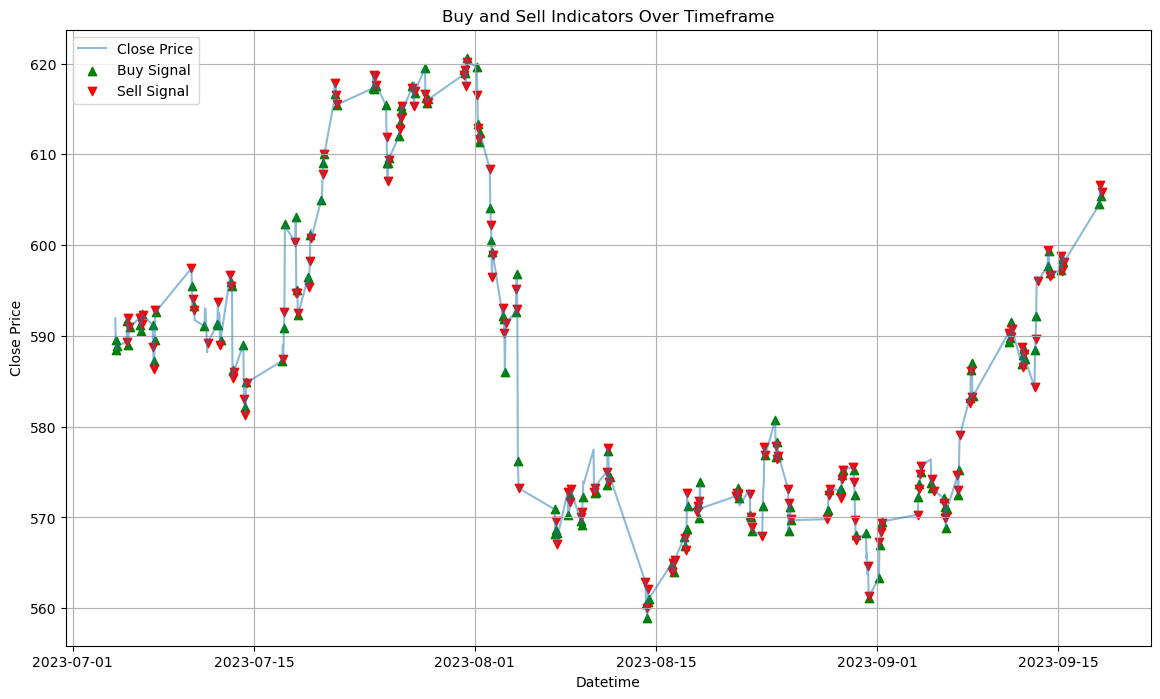

In [11]:
plt.figure(figsize=(14, 8))

# Plotting the close prices
plt.plot(df['Datetime'], df['Close'], label='Close Price', alpha=0.5)

# Identify and plot Buy signals
buy_signals = df[df['BUY'] == 1]
plt.scatter(buy_signals['Datetime'], buy_signals['Close'], marker='^', color='g', alpha=1, label='Buy Signal')

# Identify and plot Sell signals
sell_signals = df[df['SELL'] == 1]
plt.scatter(sell_signals['Datetime'], sell_signals['Close'], marker='v', color='r', alpha=1, label='Sell Signal')

# Additional plot settings
plt.title('Buy and Sell Indicators Over Timeframe')
plt.xlabel('Datetime')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [18]:
df[df["SELL"] == 1]["Close"].sum() - df[df["BUY"] == 1]["Close"].sum() + df["Close"].iloc[-1] * data["shares_holding"]

3754.5492553710938

6664.3497314453125

In [22]:
environment=77 
result = {'cummulative_profit_loss': tensor(8244.4766, device='cuda:0'), 'shares_holding': tensor(11., device='cuda:0'), 'reward': tensor(44204.6406, device='cuda:0'), 'good_buys': 136, 'good_sells': 131, 'good_holds': 97, 'bad_buys': 5, 'bad_sells': 2, 'bad_holds': 1, 'successful_trades': 73, 'unsuccessful_trades': 58, 'holdings': tensor(10227.9727, device='cuda:0'), 'remaining_amount': tensor(3563.6233, device='cuda:0')}
result

{'cummulative_profit_loss': tensor(8244.4766, device='cuda:0'),
 'shares_holding': tensor(11., device='cuda:0'),
 'reward': tensor(44204.6406, device='cuda:0'),
 'good_buys': 136,
 'good_sells': 131,
 'good_holds': 97,
 'bad_buys': 5,
 'bad_sells': 2,
 'bad_holds': 1,
 'successful_trades': 73,
 'unsuccessful_trades': 58,
 'holdings': tensor(10227.9727, device='cuda:0'),
 'remaining_amount': tensor(3563.6233, device='cuda:0')}

In [55]:
data = {
    "cummulative_profit_loss": 5512.6001,
    "shares_holding": 16.,
    "reward": 54563.1211,
    "good_buys": 166,
    "good_sells": 161,
    "good_holds": 44,
    "bad_buys": 0,
    "bad_sells": 0,
    "bad_holds": 1,
    "successful_trades": 87,
    "unsuccessful_trades": 74,
    "buy_index": [
        {
            "buy_prices_with_commission": 2979.7500,
            "index": 1
        },
        {
            "buy_prices_with_commission": 2967.7500,
            "index": 2
        },
        {
            "buy_prices_with_commission": 2962.2500,
            "index": 3
        },
        {
            "buy_prices_with_commission": 2966.7500,
            "index": 5
        },
        {
            "buy_prices_with_commission": 2980.,
            "index": 7
        },
        {
            "buy_prices_with_commission": 2975.,
            "index": 11
        },
        {
            "buy_prices_with_commission": 2972.5000,
            "index": 15
        },
        {
            "buy_prices_with_commission": 2982.,
            "index": 17
        },
        {
            "buy_prices_with_commission": 2976.2500,
            "index": 19
        },
        {
            "buy_prices_with_commission": 2956.,
            "index": 21
        },
        {
            "buy_prices_with_commission": 2984.,
            "index": 24
        },
        {
            "buy_prices_with_commission": 3007.2500,
            "index": 26
        },
        {
            "buy_prices_with_commission": 2990.2500,
            "index": 29
        },
        {
            "buy_prices_with_commission": 2984.2500,
            "index": 31
        },
        {
            "buy_prices_with_commission": 2985.2500,
            "index": 34
        },
        {
            "buy_prices_with_commission": 2978.,
            "index": 36
        },
        {
            "buy_prices_with_commission": 2961.,
            "index": 38
        },
        {
            "buy_prices_with_commission": 2976.7500,
            "index": 40
        },
        {
            "buy_prices_with_commission": 2976.2500,
            "index": 42
        },
        {
            "buy_prices_with_commission": 2981.2500,
            "index": 44
        },
        {
            "buy_prices_with_commission": 2968.,
            "index": 46
        },
        {
            "buy_prices_with_commission": 2999.7500,
            "index": 48
        },
        {
            "buy_prices_with_commission": 2946.7500,
            "index": 51
        },
        {
            "buy_prices_with_commission": 2950.,
            "index": 53
        },
        {
            "buy_prices_with_commission": 2935.,
            "index": 56
        },
        {
            "buy_prices_with_commission": 2926.5000,
            "index": 58
        },
        {
            "buy_prices_with_commission": 2944.2500,
            "index": 60
        },
        {
            "buy_prices_with_commission": 2964.7500,
            "index": 62
        },
        {
            "buy_prices_with_commission": 2974.5000,
            "index": 64
        },
        {
            "buy_prices_with_commission": 3031.5000,
            "index": 66
        },
        {
            "buy_prices_with_commission": 3021.7500,
            "index": 68
        },
        {
            "buy_prices_with_commission": 2993.7500,
            "index": 70
        },
        {
            "buy_prices_with_commission": 2993.5000,
            "index": 72
        },
        {
            "buy_prices_with_commission": 3002.5000,
            "index": 75
        },
        {
            "buy_prices_with_commission": 3000.7500,
            "index": 77
        },
        {
            "buy_prices_with_commission": 3028.5000,
            "index": 80
        },
        {
            "buy_prices_with_commission": 3044.7500,
            "index": 82
        },
        {
            "buy_prices_with_commission": 3052.2500,
            "index": 84
        },
        {
            "buy_prices_with_commission": 3065.,
            "index": 86
        },
        {
            "buy_prices_with_commission": 3070.2500,
            "index": 88
        },
        {
            "buy_prices_with_commission": 3109.5000,
            "index": 90
        },
        {
            "buy_prices_with_commission": 3097.2500,
            "index": 94
        },
        {
            "buy_prices_with_commission": 3106.5000,
            "index": 96
        },
        {
            "buy_prices_with_commission": 3106.,
            "index": 98
        },
        {
            "buy_prices_with_commission": 3113.2500,
            "index": 100
        },
        {
            "buy_prices_with_commission": 3108.2500,
            "index": 102
        },
        {
            "buy_prices_with_commission": 3079.7500,
            "index": 104
        },
        {
            "buy_prices_with_commission": 3055.5000,
            "index": 106
        },
        {
            "buy_prices_with_commission": 3066.7500,
            "index": 108
        },
        {
            "buy_prices_with_commission": 3080.,
            "index": 110
        },
        {
            "buy_prices_with_commission": 3087.5000,
            "index": 112
        },
        {
            "buy_prices_with_commission": 3096.5000,
            "index": 114
        },
        {
            "buy_prices_with_commission": 3094.2500,
            "index": 116
        },
        {
            "buy_prices_with_commission": 3107.5000,
            "index": 118
        },
        {
            "buy_prices_with_commission": 3096.5000,
            "index": 121
        },
        {
            "buy_prices_with_commission": 3105.,
            "index": 123
        },
        {
            "buy_prices_with_commission": 3103.,
            "index": 125
        },
        {
            "buy_prices_with_commission": 3098.2500,
            "index": 127
        },
        {
            "buy_prices_with_commission": 3099.,
            "index": 129
        },
        {
            "buy_prices_with_commission": 636.0500,
            "index": 130
        },
        {
            "buy_prices_with_commission": 3116.2500,
            "index": 133
        },
        {
            "buy_prices_with_commission": 3107.5000,
            "index": 135
        },
        {
            "buy_prices_with_commission": 3121.,
            "index": 137
        },
        {
            "buy_prices_with_commission": 3087.,
            "index": 140
        },
        {
            "buy_prices_with_commission": 3078.5000,
            "index": 143
        },
        {
            "buy_prices_with_commission": 3062.,
            "index": 145
        },
        {
            "buy_prices_with_commission": 3022.5000,
            "index": 148
        },
        {
            "buy_prices_with_commission": 3014.5000,
            "index": 151
        },
        {
            "buy_prices_with_commission": 2985.2500,
            "index": 153
        },
        {
            "buy_prices_with_commission": 2971.7500,
            "index": 155
        },
        {
            "buy_prices_with_commission": 2974.,
            "index": 157
        },
        {
            "buy_prices_with_commission": 2983.,
            "index": 159
        },
        {
            "buy_prices_with_commission": 3004.,
            "index": 161
        },
        {
            "buy_prices_with_commission": 2901.,
            "index": 163
        },
        {
            "buy_prices_with_commission": 2886.,
            "index": 165
        },
        {
            "buy_prices_with_commission": 2861.,
            "index": 167
        },
        {
            "buy_prices_with_commission": 2863.2500,
            "index": 169
        },
        {
            "buy_prices_with_commission": 2861.2500,
            "index": 171
        },
        {
            "buy_prices_with_commission": 2871.5000,
            "index": 174
        },
        {
            "buy_prices_with_commission": 2873.7500,
            "index": 176
        },
        {
            "buy_prices_with_commission": 2882.5000,
            "index": 178
        },
        {
            "buy_prices_with_commission": 2868.2500,
            "index": 180
        },
        {
            "buy_prices_with_commission": 2866.,
            "index": 182
        },
        {
            "buy_prices_with_commission": 2881.,
            "index": 184
        },
        {
            "buy_prices_with_commission": 2907.2500,
            "index": 187
        },
        {
            "buy_prices_with_commission": 2886.2500,
            "index": 190
        },
        {
            "buy_prices_with_commission": 2888.2500,
            "index": 193
        },
        {
            "buy_prices_with_commission": 2887.7500,
            "index": 195
        },
        {
            "buy_prices_with_commission": 2889.5000,
            "index": 199
        },
        {
            "buy_prices_with_commission": 2834.5000,
            "index": 201
        },
        {
            "buy_prices_with_commission": 2820.,
            "index": 203
        },
        {
            "buy_prices_with_commission": 2830.7500,
            "index": 205
        },
        {
            "buy_prices_with_commission": 2825.,
            "index": 207
        },
        {
            "buy_prices_with_commission": 2839.7500,
            "index": 209
        },
        {
            "buy_prices_with_commission": 2845.,
            "index": 211
        },
        {
            "buy_prices_with_commission": 2845.,
            "index": 213
        },
        {
            "buy_prices_with_commission": 2859.2500,
            "index": 215
        },
        {
            "buy_prices_with_commission": 2854.2500,
            "index": 217
        },
        {
            "buy_prices_with_commission": 2883.5000,
            "index": 220
        },
        {
            "buy_prices_with_commission": 2876.5000,
            "index": 224
        },
        {
            "buy_prices_with_commission": 2879.,
            "index": 226
        },
        {
            "buy_prices_with_commission": 2881.7500,
            "index": 229
        },
        {
            "buy_prices_with_commission": 2883.5000,
            "index": 231
        },
        {
            "buy_prices_with_commission": 2883.,
            "index": 233
        },
        {
            "buy_prices_with_commission": 2885.2500,
            "index": 236
        },
        {
            "buy_prices_with_commission": 2871.2500,
            "index": 238
        },
        {
            "buy_prices_with_commission": 2870.,
            "index": 240
        },
        {
            "buy_prices_with_commission": 2862.5000,
            "index": 242
        },
        {
            "buy_prices_with_commission": 2885.2500,
            "index": 245
        },
        {
            "buy_prices_with_commission": 2908.7500,
            "index": 247
        },
        {
            "buy_prices_with_commission": 2904.5000,
            "index": 249
        },
        {
            "buy_prices_with_commission": 2909.5000,
            "index": 251
        },
        {
            "buy_prices_with_commission": 2902.,
            "index": 253
        },
        {
            "buy_prices_with_commission": 2904.5000,
            "index": 256
        },
        {
            "buy_prices_with_commission": 2862.5000,
            "index": 258
        },
        {
            "buy_prices_with_commission": 2875.5000,
            "index": 260
        },
        {
            "buy_prices_with_commission": 2869.,
            "index": 264
        },
        {
            "buy_prices_with_commission": 2878.5000,
            "index": 266
        },
        {
            "buy_prices_with_commission": 2885.,
            "index": 268
        },
        {
            "buy_prices_with_commission": 2885.7500,
            "index": 270
        },
        {
            "buy_prices_with_commission": 2880.7500,
            "index": 272
        },
        {
            "buy_prices_with_commission": 2891.2500,
            "index": 274
        },
        {
            "buy_prices_with_commission": 594.7000,
            "index": 275
        },
        {
            "buy_prices_with_commission": 2896.2500,
            "index": 277
        },
        {
            "buy_prices_with_commission": 2896.,
            "index": 279
        },
        {
            "buy_prices_with_commission": 2882.2500,
            "index": 281
        },
        {
            "buy_prices_with_commission": 2860.2500,
            "index": 283
        },
        {
            "buy_prices_with_commission": 2861.5000,
            "index": 285
        },
        {
            "buy_prices_with_commission": 2850.,
            "index": 287
        },
        {
            "buy_prices_with_commission": 2826.7500,
            "index": 291
        },
        {
            "buy_prices_with_commission": 2856.2500,
            "index": 293
        },
        {
            "buy_prices_with_commission": 2862.,
            "index": 295
        },
        {
            "buy_prices_with_commission": 2866.7500,
            "index": 297
        },
        {
            "buy_prices_with_commission": 2871.5000,
            "index": 299
        },
        {
            "buy_prices_with_commission": 2312.3999,
            "index": 301
        },
        {
            "buy_prices_with_commission": 2893.7500,
            "index": 303
        },
        {
            "buy_prices_with_commission": 2898.5000,
            "index": 305
        },
        {
            "buy_prices_with_commission": 2888.7500,
            "index": 307
        },
        {
            "buy_prices_with_commission": 2886.,
            "index": 311
        },
        {
            "buy_prices_with_commission": 2880.7500,
            "index": 313
        },
        {
            "buy_prices_with_commission": 2875.7500,
            "index": 315
        },
        {
            "buy_prices_with_commission": 2864.2500,
            "index": 317
        },
        {
            "buy_prices_with_commission": 2891.5000,
            "index": 320
        },
        {
            "buy_prices_with_commission": 2882.5000,
            "index": 322
        },
        {
            "buy_prices_with_commission": 2915.2500,
            "index": 326
        },
        {
            "buy_prices_with_commission": 2933.2500,
            "index": 328
        },
        {
            "buy_prices_with_commission": 2950.5000,
            "index": 330
        },
        {
            "buy_prices_with_commission": 2936.2500,
            "index": 332
        },
        {
            "buy_prices_with_commission": 2971.7500,
            "index": 334
        },
        {
            "buy_prices_with_commission": 2968.7500,
            "index": 337
        },
        {
            "buy_prices_with_commission": 2977.7500,
            "index": 339
        },
        {
            "buy_prices_with_commission": 2954.7500,
            "index": 341
        },
        {
            "buy_prices_with_commission": 2959.2500,
            "index": 343
        },
        {
            "buy_prices_with_commission": 2962.7500,
            "index": 345
        },
        {
            "buy_prices_with_commission": 2957.5000,
            "index": 347
        },
        {
            "buy_prices_with_commission": 2962.5000,
            "index": 349
        },
        {
            "buy_prices_with_commission": 2980.7500,
            "index": 351
        },
        {
            "buy_prices_with_commission": 3002.,
            "index": 353
        },
        {
            "buy_prices_with_commission": 3008.5000,
            "index": 355
        },
        {
            "buy_prices_with_commission": 3016.7500,
            "index": 357
        },
        {
            "buy_prices_with_commission": 3002.7500,
            "index": 359
        },
        {
            "buy_prices_with_commission": 3003.7500,
            "index": 361
        },
        {
            "buy_prices_with_commission": 3014.2500,
            "index": 363
        },
        {
            "buy_prices_with_commission": 3005.7500,
            "index": 365
        },
        {
            "buy_prices_with_commission": 3010.5000,
            "index": 368
        },
        {
            "buy_prices_with_commission": 3047.5000,
            "index": 372
        }
    ],
    "sell_index": [
        {
            "last_buy_price_with_commission": 2962.2500,
            "sell_prices_with_commission": 2964.2500,
            "profit_loss": 2.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4054.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2966.7500,
            "sell_prices_with_commission": 2978.2500,
            "profit_loss": 11.5000,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4066.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2980.,
            "sell_prices_with_commission": 2975.,
            "profit_loss": -5.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4061.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2975.,
            "sell_prices_with_commission": 2979.7500,
            "profit_loss": 4.7500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4065.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2972.5000,
            "sell_prices_with_commission": 2976.5000,
            "profit_loss": 4.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4069.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2982.,
            "sell_prices_with_commission": 2981.2500,
            "profit_loss": -0.7500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4069.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2976.2500,
            "sell_prices_with_commission": 2964.,
            "profit_loss": -12.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4056.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2956.,
            "sell_prices_with_commission": 2967.7500,
            "profit_loss": 11.7500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4068.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2984.,
            "sell_prices_with_commission": 2983.2500,
            "profit_loss": -0.7500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4067.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3007.2500,
            "sell_prices_with_commission": 2987.,
            "profit_loss": -20.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4047.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2990.2500,
            "sell_prices_with_commission": 2986.2500,
            "profit_loss": -4.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4043.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2984.2500,
            "sell_prices_with_commission": 2975.2500,
            "profit_loss": -9.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4034.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2985.2500,
            "sell_prices_with_commission": 2985.,
            "profit_loss": -0.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4034.2500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2978.,
            "sell_prices_with_commission": 2971.,
            "profit_loss": -7.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4027.2500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2961.,
            "sell_prices_with_commission": 2966.2500,
            "profit_loss": 5.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4032.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2976.7500,
            "sell_prices_with_commission": 2988.7500,
            "profit_loss": 12.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4044.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2976.2500,
            "sell_prices_with_commission": 2982.7500,
            "profit_loss": 6.5000,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4051.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2981.2500,
            "sell_prices_with_commission": 2965.2500,
            "profit_loss": -16.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4035.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2968.,
            "sell_prices_with_commission": 3003.7500,
            "profit_loss": 35.7500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4070.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2999.7500,
            "sell_prices_with_commission": 2997.7500,
            "profit_loss": -2.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4068.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2946.7500,
            "sell_prices_with_commission": 2951.,
            "profit_loss": 4.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4073.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2950.,
            "sell_prices_with_commission": 2942.,
            "profit_loss": -8.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4065.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2935.,
            "sell_prices_with_commission": 2930.7500,
            "profit_loss": -4.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4060.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2926.5000,
            "sell_prices_with_commission": 2944.5000,
            "profit_loss": 18.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4078.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2944.2500,
            "sell_prices_with_commission": 2956.2500,
            "profit_loss": 12.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4090.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2964.7500,
            "sell_prices_with_commission": 2957.5000,
            "profit_loss": -7.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4083.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2974.5000,
            "sell_prices_with_commission": 2983.,
            "profit_loss": 8.5000,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4092.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3031.5000,
            "sell_prices_with_commission": 3030.,
            "profit_loss": -1.5000,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4090.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3021.7500,
            "sell_prices_with_commission": 3035.7500,
            "profit_loss": 14.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4104.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2993.7500,
            "sell_prices_with_commission": 2995.2500,
            "profit_loss": 1.5000,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4106.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2993.5000,
            "sell_prices_with_commission": 2982.5000,
            "profit_loss": -11.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4095.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3002.5000,
            "sell_prices_with_commission": 2996.7500,
            "profit_loss": -5.7500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4089.2500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3000.7500,
            "sell_prices_with_commission": 3025.5000,
            "profit_loss": 24.7500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4114.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3028.5000,
            "sell_prices_with_commission": 3023.7500,
            "profit_loss": -4.7500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4109.2500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3044.7500,
            "sell_prices_with_commission": 3043.5000,
            "profit_loss": -1.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4108.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3052.2500,
            "sell_prices_with_commission": 3059.2500,
            "profit_loss": 7.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4115.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3065.,
            "sell_prices_with_commission": 3070.2500,
            "profit_loss": 5.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4120.2500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3070.2500,
            "sell_prices_with_commission": 3099.2500,
            "profit_loss": 29.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4149.2500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3109.5000,
            "sell_prices_with_commission": 3102.7500,
            "profit_loss": -6.7500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4142.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3097.2500,
            "sell_prices_with_commission": 3097.5000,
            "profit_loss": 0.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4142.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3106.5000,
            "sell_prices_with_commission": 3113.5000,
            "profit_loss": 7.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4149.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3106.,
            "sell_prices_with_commission": 3115.2500,
            "profit_loss": 9.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4159.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3113.2500,
            "sell_prices_with_commission": 3107.7500,
            "profit_loss": -5.5000,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4153.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3108.2500,
            "sell_prices_with_commission": 3097.,
            "profit_loss": -11.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4142.2500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3079.7500,
            "sell_prices_with_commission": 3065.2500,
            "profit_loss": -14.5000,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4127.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3055.5000,
            "sell_prices_with_commission": 3065.,
            "profit_loss": 9.5000,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4137.2500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3066.7500,
            "sell_prices_with_commission": 3068.,
            "profit_loss": 1.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4138.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3080.,
            "sell_prices_with_commission": 3083.7500,
            "profit_loss": 3.7500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4142.2500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3087.5000,
            "sell_prices_with_commission": 3090.,
            "profit_loss": 2.5000,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4144.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3096.5000,
            "sell_prices_with_commission": 3096.5000,
            "profit_loss": 0.,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4144.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3094.2500,
            "sell_prices_with_commission": 3106.5000,
            "profit_loss": 12.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4157.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3107.5000,
            "sell_prices_with_commission": 3109.7500,
            "profit_loss": 2.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4159.2500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3096.5000,
            "sell_prices_with_commission": 3103.7500,
            "profit_loss": 7.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4166.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3105.,
            "sell_prices_with_commission": 3117.5000,
            "profit_loss": 12.5000,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4179.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3103.,
            "sell_prices_with_commission": 3101.2500,
            "profit_loss": -1.7500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4177.2500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3098.2500,
            "sell_prices_with_commission": 3098.5000,
            "profit_loss": 0.2500,
            "shares_holdings": 10.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 4177.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 636.0500,
            "sell_prices_with_commission": 3116.7500,
            "profit_loss": 2480.7000,
            "shares_holdings": 11.,
            "shares_bought": 1.,
            "shares_sold": 5,
            "available_price": 3559.2000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3116.2500,
            "sell_prices_with_commission": 3114.7500,
            "profit_loss": -1.5000,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3557.7000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3107.5000,
            "sell_prices_with_commission": 3123.2500,
            "profit_loss": 15.7500,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3573.4500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3121.,
            "sell_prices_with_commission": 3102.5000,
            "profit_loss": -18.5000,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3554.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3087.,
            "sell_prices_with_commission": 3077.,
            "profit_loss": -10.,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3544.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3078.5000,
            "sell_prices_with_commission": 3081.7500,
            "profit_loss": 3.2500,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3548.2000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3062.,
            "sell_prices_with_commission": 3031.,
            "profit_loss": -31.,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3517.2000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3022.5000,
            "sell_prices_with_commission": 3016.2500,
            "profit_loss": -6.2500,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3510.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3014.5000,
            "sell_prices_with_commission": 2981.,
            "profit_loss": -33.5000,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3477.4500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2985.2500,
            "sell_prices_with_commission": 2979.5000,
            "profit_loss": -5.7500,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3471.7000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2971.7500,
            "sell_prices_with_commission": 2950.,
            "profit_loss": -21.7500,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3449.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2974.,
            "sell_prices_with_commission": 2977.,
            "profit_loss": 3.,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3452.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2983.,
            "sell_prices_with_commission": 2996.,
            "profit_loss": 13.,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3465.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3004.,
            "sell_prices_with_commission": 2985.,
            "profit_loss": -19.,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3446.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2901.,
            "sell_prices_with_commission": 2889.5000,
            "profit_loss": -11.5000,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3435.4500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2886.,
            "sell_prices_with_commission": 2874.5000,
            "profit_loss": -11.5000,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3423.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2861.,
            "sell_prices_with_commission": 2868.2500,
            "profit_loss": 7.2500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3431.2000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2863.2500,
            "sell_prices_with_commission": 2855.5000,
            "profit_loss": -7.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3423.4500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2861.2500,
            "sell_prices_with_commission": 2884.,
            "profit_loss": 22.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3446.2000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2871.5000,
            "sell_prices_with_commission": 2877.2500,
            "profit_loss": 5.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3451.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2873.7500,
            "sell_prices_with_commission": 2878.7500,
            "profit_loss": 5.,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3456.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2882.5000,
            "sell_prices_with_commission": 2885.5000,
            "profit_loss": 3.,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3459.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2868.2500,
            "sell_prices_with_commission": 2870.2500,
            "profit_loss": 2.,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3461.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2866.,
            "sell_prices_with_commission": 2873.,
            "profit_loss": 7.,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3468.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2881.,
            "sell_prices_with_commission": 2888.7500,
            "profit_loss": 7.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3476.7000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2907.2500,
            "sell_prices_with_commission": 2883.5000,
            "profit_loss": -23.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3452.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2886.2500,
            "sell_prices_with_commission": 2888.,
            "profit_loss": 1.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3454.7000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2888.2500,
            "sell_prices_with_commission": 2895.,
            "profit_loss": 6.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3461.4500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2887.7500,
            "sell_prices_with_commission": 2899.2500,
            "profit_loss": 11.5000,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3472.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2889.5000,
            "sell_prices_with_commission": 2892.5000,
            "profit_loss": 3.,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3475.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2834.5000,
            "sell_prices_with_commission": 2822.5000,
            "profit_loss": -12.,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3463.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2820.,
            "sell_prices_with_commission": 2814.7500,
            "profit_loss": -5.2500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3458.7000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2830.7500,
            "sell_prices_with_commission": 2823.5000,
            "profit_loss": -7.2500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3451.4500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2825.,
            "sell_prices_with_commission": 2844.2500,
            "profit_loss": 19.2500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3470.7000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2839.7500,
            "sell_prices_with_commission": 2844.5000,
            "profit_loss": 4.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3475.4500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2845.,
            "sell_prices_with_commission": 2840.,
            "profit_loss": -5.,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3470.4500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2845.,
            "sell_prices_with_commission": 2846.5000,
            "profit_loss": 1.5000,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3471.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2859.2500,
            "sell_prices_with_commission": 2858.5000,
            "profit_loss": -0.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3471.2000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2854.2500,
            "sell_prices_with_commission": 2863.7500,
            "profit_loss": 9.5000,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3480.7000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2883.5000,
            "sell_prices_with_commission": 2877.2500,
            "profit_loss": -6.2500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3474.4500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2876.5000,
            "sell_prices_with_commission": 2869.7500,
            "profit_loss": -6.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3467.7000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2879.,
            "sell_prices_with_commission": 2875.,
            "profit_loss": -4.,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3463.7000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2881.7500,
            "sell_prices_with_commission": 2884.7500,
            "profit_loss": 3.,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3466.7000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2883.5000,
            "sell_prices_with_commission": 2886.2500,
            "profit_loss": 2.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3469.4500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2883.,
            "sell_prices_with_commission": 2876.5000,
            "profit_loss": -6.5000,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3462.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2885.2500,
            "sell_prices_with_commission": 2883.,
            "profit_loss": -2.2500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3460.7000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2871.2500,
            "sell_prices_with_commission": 2870.5000,
            "profit_loss": -0.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3459.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2870.,
            "sell_prices_with_commission": 2864.5000,
            "profit_loss": -5.5000,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3454.4500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2862.5000,
            "sell_prices_with_commission": 2876.5000,
            "profit_loss": 14.,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3468.4500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2885.2500,
            "sell_prices_with_commission": 2888.5000,
            "profit_loss": 3.2500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3471.7000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2908.7500,
            "sell_prices_with_commission": 2904.2500,
            "profit_loss": -4.5000,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3467.2000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2904.5000,
            "sell_prices_with_commission": 2923.5000,
            "profit_loss": 19.,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3486.2000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2909.5000,
            "sell_prices_with_commission": 2903.5000,
            "profit_loss": -6.,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3480.2000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2902.,
            "sell_prices_with_commission": 2911.7500,
            "profit_loss": 9.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3489.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2904.5000,
            "sell_prices_with_commission": 2885.5000,
            "profit_loss": -19.,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3470.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2862.5000,
            "sell_prices_with_commission": 2877.7500,
            "profit_loss": 15.2500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3486.2000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2875.5000,
            "sell_prices_with_commission": 2868.5000,
            "profit_loss": -7.,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3479.2000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2869.,
            "sell_prices_with_commission": 2874.,
            "profit_loss": 5.,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3484.2000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2878.5000,
            "sell_prices_with_commission": 2882.2500,
            "profit_loss": 3.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3487.9500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2885.,
            "sell_prices_with_commission": 2884.2500,
            "profit_loss": -0.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3487.2000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2885.7500,
            "sell_prices_with_commission": 2885.,
            "profit_loss": -0.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3486.4500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2880.7500,
            "sell_prices_with_commission": 2885.5000,
            "profit_loss": 4.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3491.2000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 594.7000,
            "sell_prices_with_commission": 2896.,
            "profit_loss": 2301.3000,
            "shares_holdings": 12.,
            "shares_bought": 1.,
            "shares_sold": 5,
            "available_price": 2901.2500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2896.2500,
            "sell_prices_with_commission": 2897.7500,
            "profit_loss": 1.5000,
            "shares_holdings": 12.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 2902.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2896.,
            "sell_prices_with_commission": 2889.2500,
            "profit_loss": -6.7500,
            "shares_holdings": 12.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 2896.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2882.2500,
            "sell_prices_with_commission": 2868.5000,
            "profit_loss": -13.7500,
            "shares_holdings": 12.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 2882.2500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2860.2500,
            "sell_prices_with_commission": 2857.5000,
            "profit_loss": -2.7500,
            "shares_holdings": 12.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 2879.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2861.5000,
            "sell_prices_with_commission": 2847.5000,
            "profit_loss": -14.,
            "shares_holdings": 12.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 2865.5000,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2850.,
            "sell_prices_with_commission": 2825.7500,
            "profit_loss": -24.2500,
            "shares_holdings": 12.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 2841.2500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2826.7500,
            "sell_prices_with_commission": 2836.5000,
            "profit_loss": 9.7500,
            "shares_holdings": 12.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 2851.,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2856.2500,
            "sell_prices_with_commission": 2855.,
            "profit_loss": -1.2500,
            "shares_holdings": 12.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 2849.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2862.,
            "sell_prices_with_commission": 2866.,
            "profit_loss": 4.,
            "shares_holdings": 12.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 2853.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2866.7500,
            "sell_prices_with_commission": 2867.7500,
            "profit_loss": 1.,
            "shares_holdings": 12.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 2854.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2871.5000,
            "sell_prices_with_commission": 2881.5000,
            "profit_loss": 10.,
            "shares_holdings": 12.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 2864.7500,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2312.3999,
            "sell_prices_with_commission": 2888.5000,
            "profit_loss": 576.1001,
            "shares_holdings": 11.,
            "shares_bought": 4.,
            "shares_sold": 5,
            "available_price": 3440.8501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2893.7500,
            "sell_prices_with_commission": 2895.2500,
            "profit_loss": 1.5000,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3442.3501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2898.5000,
            "sell_prices_with_commission": 2902.,
            "profit_loss": 3.5000,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3445.8501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2888.7500,
            "sell_prices_with_commission": 2887.5000,
            "profit_loss": -1.2500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3444.6001,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2886.,
            "sell_prices_with_commission": 2884.7500,
            "profit_loss": -1.2500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3443.3501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2880.7500,
            "sell_prices_with_commission": 2877.7500,
            "profit_loss": -3.,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3440.3501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2875.7500,
            "sell_prices_with_commission": 2869.5000,
            "profit_loss": -6.2500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3434.1001,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2864.2500,
            "sell_prices_with_commission": 2874.7500,
            "profit_loss": 10.5000,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3444.6001,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2891.5000,
            "sell_prices_with_commission": 2893.2500,
            "profit_loss": 1.7500,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3446.3501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2882.5000,
            "sell_prices_with_commission": 2911.2500,
            "profit_loss": 28.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3475.1001,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2915.2500,
            "sell_prices_with_commission": 2936.,
            "profit_loss": 20.7500,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3495.8501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2933.2500,
            "sell_prices_with_commission": 2951.2500,
            "profit_loss": 18.,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3513.8501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2950.5000,
            "sell_prices_with_commission": 2955.,
            "profit_loss": 4.5000,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3518.3501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2936.2500,
            "sell_prices_with_commission": 2936.7500,
            "profit_loss": 0.5000,
            "shares_holdings": 11.,
            "shares_bought": 5,
            "shares_sold": 5,
            "available_price": 3518.8501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2971.7500,
            "sell_prices_with_commission": 2969.7500,
            "profit_loss": -2.,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3516.8501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2968.7500,
            "sell_prices_with_commission": 2969.2500,
            "profit_loss": 0.5000,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3517.3501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2977.7500,
            "sell_prices_with_commission": 2974.,
            "profit_loss": -3.7500,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3513.6001,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2954.7500,
            "sell_prices_with_commission": 2964.,
            "profit_loss": 9.2500,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3522.8501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2959.2500,
            "sell_prices_with_commission": 2952.7500,
            "profit_loss": -6.5000,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3516.3501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2962.7500,
            "sell_prices_with_commission": 2960.,
            "profit_loss": -2.7500,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3513.6001,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2957.5000,
            "sell_prices_with_commission": 2941.7500,
            "profit_loss": -15.7500,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3497.8501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2962.5000,
            "sell_prices_with_commission": 2968.2500,
            "profit_loss": 5.7500,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3503.6001,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 2980.7500,
            "sell_prices_with_commission": 3002.7500,
            "profit_loss": 22.,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3525.6001,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3002.,
            "sell_prices_with_commission": 3000.,
            "profit_loss": -2.,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3523.6001,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3008.5000,
            "sell_prices_with_commission": 3017.5000,
            "profit_loss": 9.,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3532.6001,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3016.7500,
            "sell_prices_with_commission": 3010.7500,
            "profit_loss": -6.,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3526.6001,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3002.7500,
            "sell_prices_with_commission": 3004.7500,
            "profit_loss": 2.,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3528.6001,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3003.7500,
            "sell_prices_with_commission": 3006.5000,
            "profit_loss": 2.7500,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3531.3501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3014.2500,
            "sell_prices_with_commission": 3012.5000,
            "profit_loss": -1.7500,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3529.6001,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3005.7500,
            "sell_prices_with_commission": 3014.5000,
            "profit_loss": 8.7500,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3538.3501,
            "cummulative_profit_loss": 5512.6001
        },
        {
            "last_buy_price_with_commission": 3010.5000,
            "sell_prices_with_commission": 3047.,
            "profit_loss": 36.5000,
            "shares_holdings": 11.,
            "shares_bought": 5.,
            "shares_sold": 5,
            "available_price": 3574.8501,
            "cummulative_profit_loss": 5512.6001
        }
    ],
    "holdings": 10220.9492,
    "remaining_amount": 527.3501
}

In [56]:
pl.DataFrame(data["sell_index"]).write_excel("results.xlsx")